In [1]:
import tensorflow as tf

2022-10-20 10:14:45.935080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
def line(val):
    print('---   ---   ---   ---   ---   ---   [ ', str(val), ' ]   ---   ---   ---   ---   ---   ---')

# FakeDeS2021

## Load and join data

In [3]:
# load the data
df = pd.read_csv("[FakeDeS2021]train.csv")
line('dataset description')
df.info()
line('first lines')
df.head()

---   ---   ---   ---   ---   ---   [  dataset description  ]   ---   ---   ---   ---   ---   ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        676 non-null    int64 
 1   Category  676 non-null    object
 2   Topic     676 non-null    object
 3   Source    676 non-null    object
 4   Headline  676 non-null    object
 5   Text      676 non-null    object
 6   Link      676 non-null    object
dtypes: int64(1), object(6)
memory usage: 37.1+ KB
---   ---   ---   ---   ---   ---   [  first lines  ]   ---   ---   ---   ---   ---   ---


Id Category      Topic          Source  \
0   1     Fake  Education  El Ruinaversal   
1   2     Fake  Education     Hay noticia   
2   3     Fake  Education  El Ruinaversal   
3   4     True  Education    EL UNIVERSAL   
4   5     Fake  Education          Lamula   

                                            Headline  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1            La palabra "haiga", aceptada por la RAE   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                                Text  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La Rea...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  Alerta: pretenden aprobar libros escolares con...   

                                                Link  
0  http://www.elruinaversal.com/2017/06/10/rae-in...  
1  https://haynoticia.es/la-palabra-haiga-aceptad...  
2  http://www.elruinaversal.com/2018/05/06/yordi-...  
3  http://www.eluniversal.com.mx/articulo/nacion/...  
4  https://redaccion.lamula.pe/2018/06/19/memoria...

In [4]:
# Transform to vale
df.loc[df.Category == "Fake", "Category"] = 1
df.loc[df.Category == "True", "Category"] = 0

In [5]:
line('dataset transformed (Category)')
df.head()

---   ---   ---   ---   ---   ---   [  dataset transformed (Category)  ]   ---   ---   ---   ---   ---   ---


Id Category      Topic          Source  \
0   1        1  Education  El Ruinaversal   
1   2        1  Education     Hay noticia   
2   3        1  Education  El Ruinaversal   
3   4        0  Education    EL UNIVERSAL   
4   5        1  Education          Lamula   

                                            Headline  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1            La palabra "haiga", aceptada por la RAE   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                                Text  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La Rea...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  Alerta: pretenden aprobar libros escolares con...   

                                                Link  
0  http://www.elruinaversal.com/2017/06/10/rae-in...  
1  https://haynoticia.es/la-palabra-haiga-aceptad...  
2  http://www.elruinaversal.com/2018/05/06/yordi-...  
3  http://www.eluniversal.com.mx/articulo/nacion/...  
4  https://redaccion.lamula.pe/2018/06/19/memoria...

In [6]:
# combine title and text together
df['original'] = df['Headline'] + ' ' + df['Text']
line('dataset transformed (Headline + Text)')
df.head()

---   ---   ---   ---   ---   ---   [  dataset transformed (Headline + Text)  ]   ---   ---   ---   ---   ---   ---


Id Category      Topic          Source  \
0   1        1  Education  El Ruinaversal   
1   2        1  Education     Hay noticia   
2   3        1  Education  El Ruinaversal   
3   4        0  Education    EL UNIVERSAL   
4   5        1  Education          Lamula   

                                            Headline  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1            La palabra "haiga", aceptada por la RAE   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                                Text  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La Rea...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  Alerta: pretenden aprobar libros escolares con...   

                                                Link  \
0  http://www.elruinaversal.com/2017/06/10/rae-in...   
1  https://haynoticia.es/la-palabra-haiga-aceptad...   
2  http://www.elruinaversal.com/2018/05/06/yordi-...   
3  http://www.eluniversal.com.mx/articulo/nacion/...   
4  https://redaccion.lamula.pe/2018/06/19/memoria...   

                                            original  
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...  
1  La palabra "haiga", aceptada por la RAE La pal...  
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...  
3  UNAM capacitará a maestros para aprobar prueba...  
4  pretenden aprobar libros escolares con conteni...

In [7]:
# df['original'][0]

## Data cleaning

In [8]:
import gensim
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
# To add more stopwords
stop_words.extend(['number'])

In [9]:
line('print stop_words from spanish nltk')
print(stop_words)

---   ---   ---   ---   ---   ---   [  print stop_words from spanish nltk  ]   ---   ---   ---   ---   ---   ---
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestr

In [10]:
# import required module (pip install Unidecode)
import unidecode

# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            # remove ascents
            # token = unidecode.unidecode(token)
            result.append(token)
            
    return result

In [11]:
# Apply preprocess function
df['clean'] = df['original'].apply(preprocess)

In [12]:
line('original data')
print(df['original'][0])
line('clean data')
print(df['clean'][0])

---   ---   ---   ---   ---   ---   [  original data  ]   ---   ---   ---   ---   ---   ---
RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLEMÁTICA" RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLEMÁTICA"
España.- El presidente de la Real Academia Española (RAE), Darío Villanueva, informó en conferencia de prensa que a partir del próximo mes se incluirá el término "Lady" como una nueva palabra en el diccionario del idioma español.
Darío señaló que "Lady" servirá para definir a una "mujer problemática" o a una "mujer que causa problemas", y mencionó que esta palabra será una de las pocas que también se utilizan en el idioma inglés pero que en castellano tiene un significado diferente:
"Son contadas las palabras del idioma inglés que se utilizan en el español pero que tienen otro significado. Con la globalización las personas han comenzado a adoptar términos anglosajones pero los utiliz

In [13]:
line('actual dataframe')
df.head()

---   ---   ---   ---   ---   ---   [  actual dataframe  ]   ---   ---   ---   ---   ---   ---


Id Category      Topic          Source  \
0   1        1  Education  El Ruinaversal   
1   2        1  Education     Hay noticia   
2   3        1  Education  El Ruinaversal   
3   4        0  Education    EL UNIVERSAL   
4   5        1  Education          Lamula   

                                            Headline  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1            La palabra "haiga", aceptada por la RAE   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                                Text  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La Rea...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  Alerta: pretenden aprobar libros escolares con...   

                                                Link  \
0  http://www.elruinaversal.com/2017/06/10/rae-in...   
1  https://haynoticia.es/la-palabra-haiga-aceptad...   
2  http://www.elruinaversal.com/2018/05/06/yordi-...   
3  http://www.eluniversal.com.mx/articulo/nacion/...   
4  https://redaccion.lamula.pe/2018/06/19/memoria...   

                                            original  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La pal...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                               clean  
0  [incluirá, palabra, lady, diccionario, idioma,...  
1  [palabra, haiga, aceptada, palabra, haiga, ace...  
2  [yordi, rosado, escribirá, diseñará, nuevos, l...  
3  [unam, capacitará, maestros, aprobar, prueba, ...  
4  [pretenden, aprobar, libros, escolares, conten...

In [14]:
# Total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [15]:
line('list of total words')
print(list_of_words)

---   ---   ---   ---   ---   ---   [  list of total words  ]   ---   ---   ---   ---   ---   ---
['incluirá', 'palabra', 'lady', 'diccionario', 'idioma', 'español', 'definición', 'mujer', 'problemática', 'incluirá', 'palabra', 'lady', 'diccionario', 'idioma', 'español', 'definición', 'mujer', 'problemática', 'españa', 'presidente', 'real', 'academia', 'española', 'darío', 'villanueva', 'informó', 'conferencia', 'prensa', 'partir', 'próximo', 'incluirá', 'término', 'lady', 'nueva', 'palabra', 'diccionario', 'idioma', 'español', 'darío', 'señaló', 'lady', 'servirá', 'definir', 'mujer', 'problemática', 'mujer', 'causa', 'problemas', 'mencionó', 'palabra', 'pocas', 'utilizan', 'idioma', 'inglés', 'castellano', 'significado', 'diferente', 'contadas', 'palabras', 'idioma', 'inglés', 'utilizan', 'español', 'significado', 'globalización', 'personas', 'comenzado', 'adoptar', 'términos', 'anglosajones', 'utilizan', 'significado', 'real', 'embargo', 'caso', 'expresión', 'lady', 'significará', 'm

In [16]:
line('len - list of total words')
print(len(list_of_words))

---   ---   ---   ---   ---   ---   [  len - list of total words  ]   ---   ---   ---   ---   ---   ---
127220


In [17]:
line('unique words - list of total words')
total_words = len(list(set(list_of_words)))
print(total_words)

---   ---   ---   ---   ---   ---   [  unique words - list of total words  ]   ---   ---   ---   ---   ---   ---
23758


In [18]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [19]:
line('actual dataframe')
df.head()

---   ---   ---   ---   ---   ---   [  actual dataframe  ]   ---   ---   ---   ---   ---   ---


Id Category      Topic          Source  \
0   1        1  Education  El Ruinaversal   
1   2        1  Education     Hay noticia   
2   3        1  Education  El Ruinaversal   
3   4        0  Education    EL UNIVERSAL   
4   5        1  Education          Lamula   

                                            Headline  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1            La palabra "haiga", aceptada por la RAE   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                                Text  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La Rea...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  Alerta: pretenden aprobar libros escolares con...   

                                                Link  \
0  http://www.elruinaversal.com/2017/06/10/rae-in...   
1  https://haynoticia.es/la-palabra-haiga-aceptad...   
2  http://www.elruinaversal.com/2018/05/06/yordi-...   
3  http://www.eluniversal.com.mx/articulo/nacion/...   
4  https://redaccion.lamula.pe/2018/06/19/memoria...   

                                            original  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La pal...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                               clean  \
0  [incluirá, palabra, lady, diccionario, idioma,...   
1  [palabra, haiga, aceptada, palabra, haiga, ace...   
2  [yordi, rosado, escribirá, diseñará, nuevos, l...   
3  [unam, capacitará, maestros, aprobar, prueba, ...   
4  [pretenden, aprobar, libros, escolares, conten...   

                                        clean_joined  
0  incluirá palabra lady diccionario idioma españ...  
1  palabra haiga aceptada palabra haiga aceptada ...  
2  yordi rosado escribirá diseñará nuevos libros ...  
3  unam capacitará maestros aprobar prueba pisa u...  
4  pretenden aprobar libros escolares contenido s...

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='count', ylabel='Topic'>

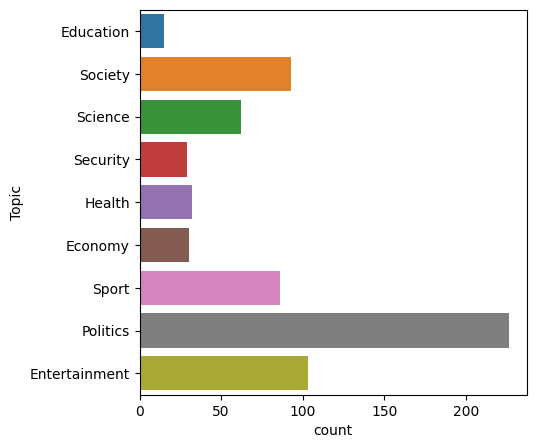

In [21]:
# plot the number of samples in 'subject'
plt.figure(figsize = (5, 5))
sns.countplot(y = "Topic", data = df)

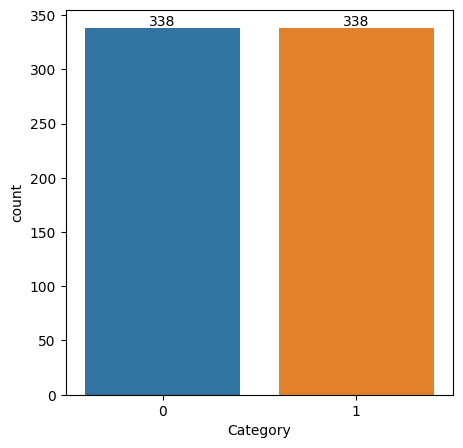

In [29]:
plt.figure(figsize = (5, 5))
counts = df['Category'].value_counts().rename_axis('Category').reset_index(name='count')
ax = sns.barplot(x='Category', y='count', data=counts)
ax.bar_label(ax.containers[0])
plt.show()

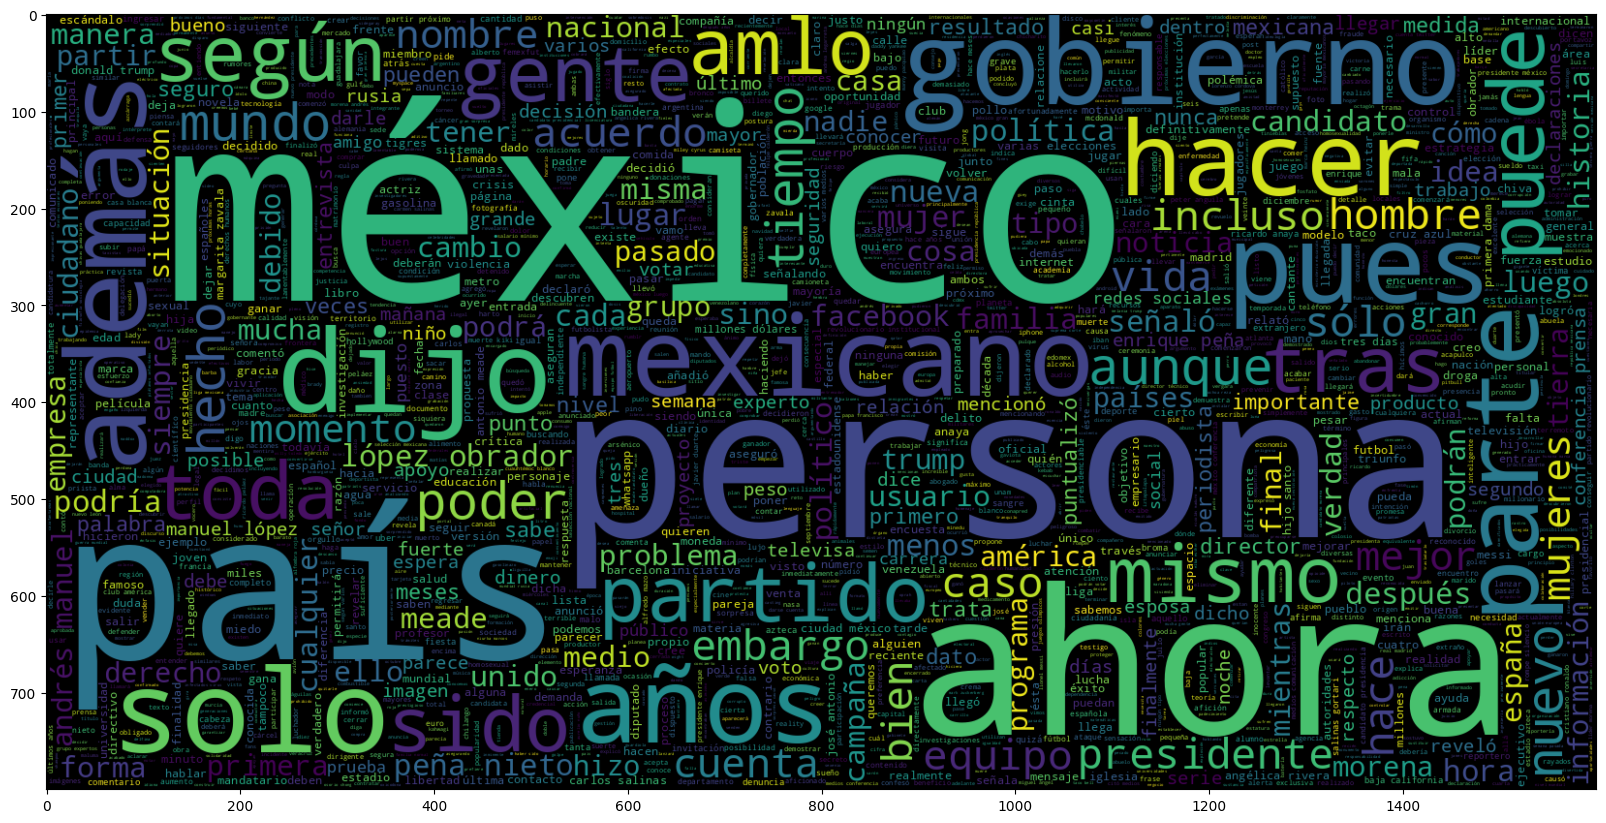

In [24]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.Category == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

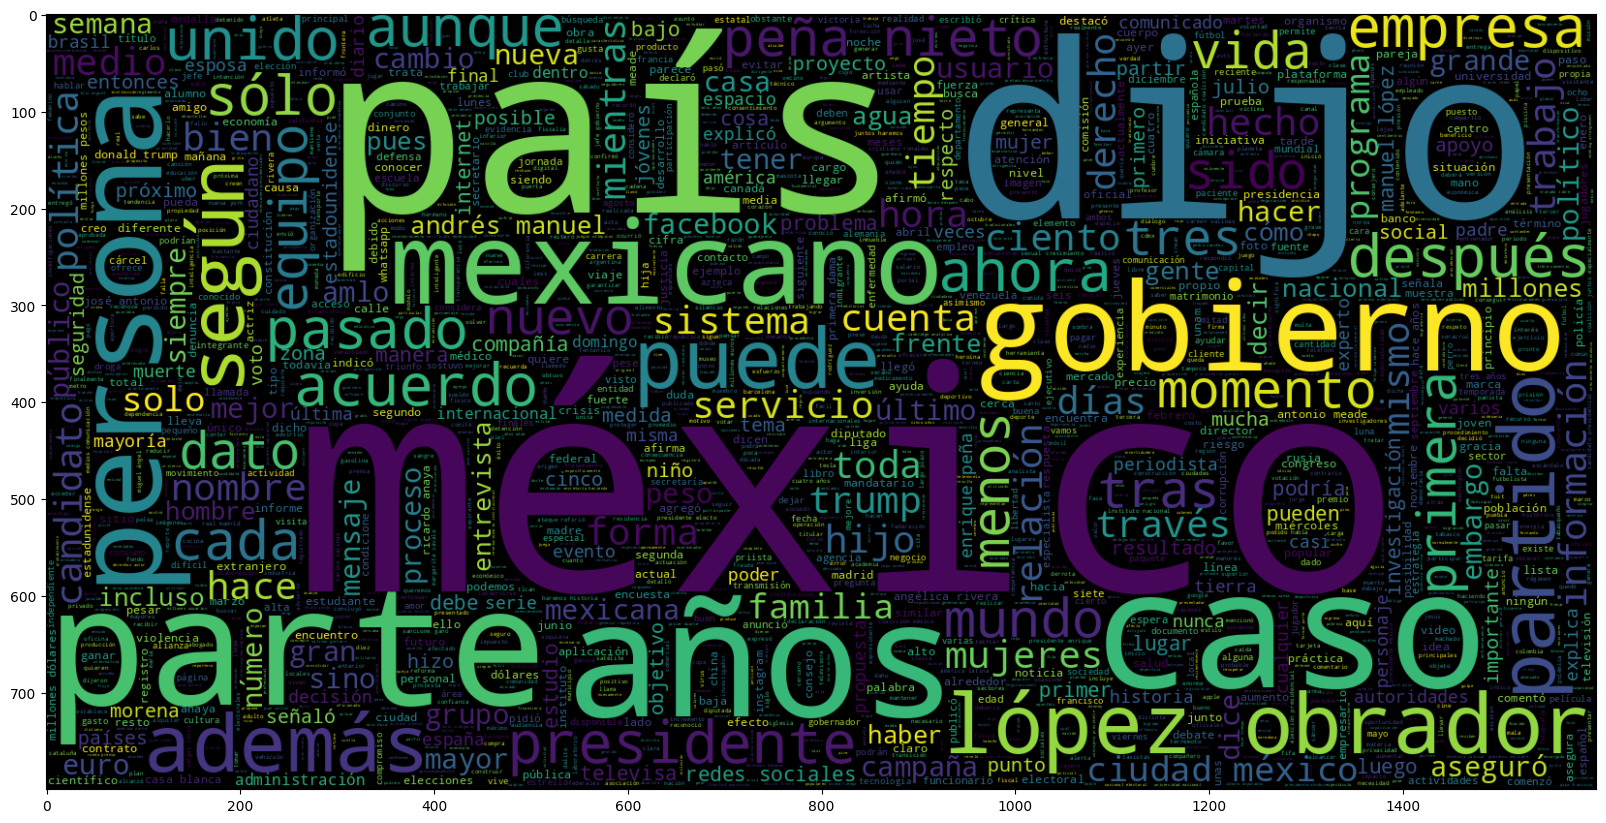

In [25]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.Category == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [26]:
new_df = df.clean_joined.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df

Word  Frequency
0          méxico        829
1            años        456
2            país        369
3        gobierno        344
4      presidente        340
...           ...        ...
23753      jaziel          1
23754     suheidi          1
23755      ixchel          1
23756     brianna          1
23757       atila          1

[23758 rows x 2 columns]

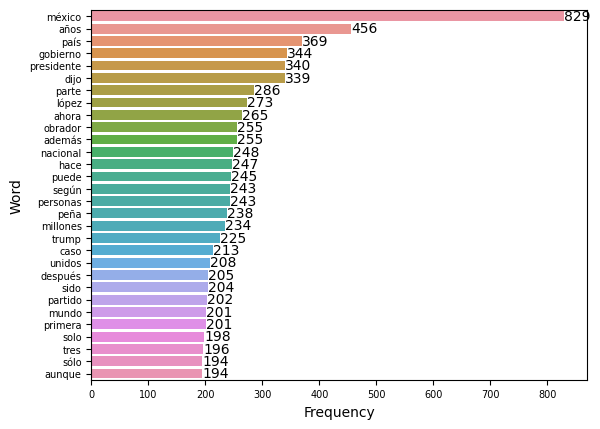

In [27]:
b = sns.barplot(x='Frequency',y='Word',data = new_df[:30])
b.tick_params(labelsize=7)
b.bar_label(b.containers[0])
plt.show()

In [28]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 1007
